Business Understanding - Pharmaceutical company looking to increase the number of  people to getting the seasonal flu vaccine

In [196]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.tree import DecisionTreeClassifier, plot_tree

 The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

behavioral_antiviral_meds - Has taken antiviral medications. (binary)

behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

behavioral_face_mask - Has bought a face mask. (binary)

behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a 
heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

health_worker - Is a healthcare worker. (binary)

health_insurance - Has health insurance. (binary)

opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

age_group - Age group of respondent.

education - Self-reported education level.

race - Race of respondent.

sex - Sex of respondent.

income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

marital_status - Marital status of respondent.

rent_or_own - Housing situation of respondent.

employment_status - Employment status of respondent.

hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and 
Human Services. Values are represented as short random character strings.

census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

household_adults - Number of other adults in household, top-coded to 3.

household_children - Number of children in household, top-coded to 3.

employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [16]:
data = pd.read_csv('data/training_set_features.csv', index_col='respondent_id')
labels = pd.read_csv('data/training_set_labels.csv', index_col='respondent_id')

In [17]:
df = data.join(labels)

In [18]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [19]:
df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [20]:
y = df['seasonal_vaccine']
X = df.drop('seasonal_vaccine', axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 20030 rows and 36 columns
y_train is a Series with 20030 values


In [23]:
X_train.isna().sum()

h1n1_concern                      67
h1n1_knowledge                    87
behavioral_antiviral_meds         56
behavioral_avoidance             157
behavioral_face_mask              14
behavioral_wash_hands             36
behavioral_large_gatherings       70
behavioral_outside_home           58
behavioral_touch_face             98
doctor_recc_h1n1                1635
doctor_recc_seasonal            1635
chronic_med_condition            717
child_under_6_months             605
health_worker                    597
health_insurance                9233
opinion_h1n1_vacc_effective      299
opinion_h1n1_risk                292
opinion_h1n1_sick_from_vacc      301
opinion_seas_vacc_effective      349
opinion_seas_risk                387
opinion_seas_sick_from_vacc      407
age_group                          0
education                       1040
race                               0
sex                                0
income_poverty                  3269
marital_status                  1038
r

<AxesSubplot:title={'center':'Education Levels and Seasonal Vaccine Rate'}, xlabel='education'>

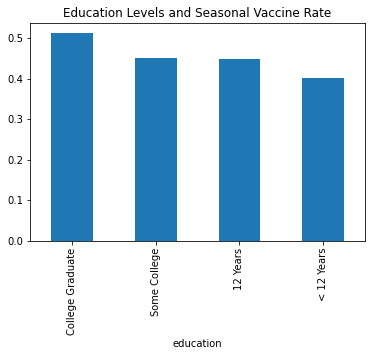

In [9]:
df.groupby('education')['seasonal_vaccine'].mean().sort_values(ascending=False).plot(
    kind='bar',
    title='Education Levels and Seasonal Vaccine Rate')

<AxesSubplot:title={'center':'Education Levels and Seasonal Vaccine Rate'}, xlabel='age_group'>

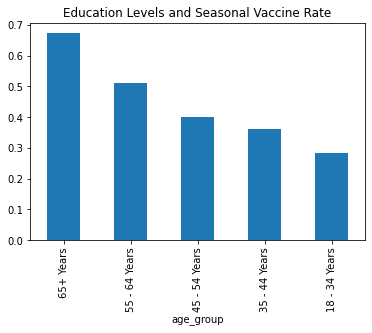

In [10]:
df.groupby('age_group')['seasonal_vaccine'].mean().sort_values(ascending=False).plot(
    kind='bar',
    title='Education Levels and Seasonal Vaccine Rate')

<AxesSubplot:title={'center':'Education Levels and Seasonal Vaccine Rate'}, xlabel='income_poverty'>

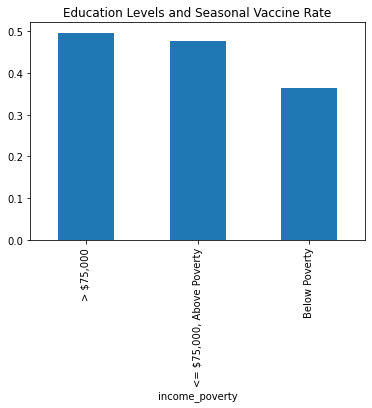

In [11]:
df.groupby('income_poverty')['seasonal_vaccine'].mean().sort_values(ascending=False).plot(
    kind='bar',
    title='Education Levels and Seasonal Vaccine Rate')

<AxesSubplot:title={'center':'Education Levels and Seasonal Vaccine Rate'}, xlabel='race'>

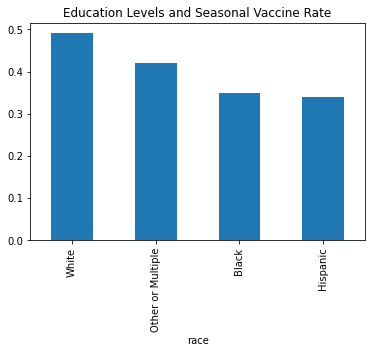

In [12]:
df.groupby('race')['seasonal_vaccine'].mean().sort_values(ascending=False).plot(
    kind='bar',
    title='Education Levels and Seasonal Vaccine Rate')

In [13]:
df['seasonal_vaccine'].value_counts(normalize = True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [25]:
numeric_cols = df.columns[df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children' 'h1n1_vaccine' 'seasonal_vaccine']


In [28]:
numeric_df = df[numeric_cols]
X = numeric_df.drop('seasonal_vaccine', axis = 1)
y = numeric_df['seasonal_vaccine']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
dummy_model = DummyClassifier(strategy="most_frequent")

In [32]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [33]:
dummy_model.predict(X_train)[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results.mean()

0.5311033449825262

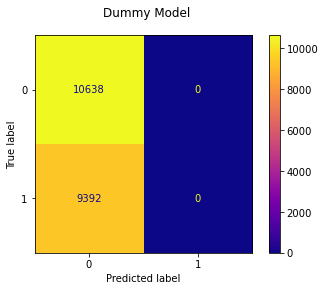

In [39]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [41]:
confusion_matrix(y_train, dummy_model.predict(X_train))

array([[10638,     0],
       [ 9392,     0]], dtype=int64)

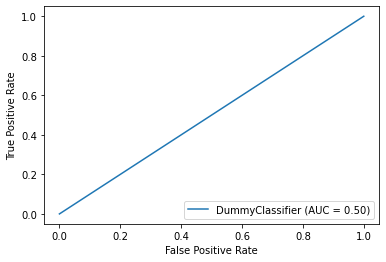

In [42]:
plot_roc_curve(dummy_model, X_train, y_train);

In [48]:
simple_logreg_model = LogisticRegression(random_state=42, penalty='none')

In [50]:
X_train.isna().sum()

h1n1_concern                     67
h1n1_knowledge                   87
behavioral_antiviral_meds        56
behavioral_avoidance            157
behavioral_face_mask             14
behavioral_wash_hands            36
behavioral_large_gatherings      70
behavioral_outside_home          58
behavioral_touch_face            98
doctor_recc_h1n1               1635
doctor_recc_seasonal           1635
chronic_med_condition           717
child_under_6_months            605
health_worker                   597
health_insurance               9233
opinion_h1n1_vacc_effective     299
opinion_h1n1_risk               292
opinion_h1n1_sick_from_vacc     301
opinion_seas_vacc_effective     349
opinion_seas_risk               387
opinion_seas_sick_from_vacc     407
household_adults                188
household_children              188
h1n1_vaccine                      0
dtype: int64

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 25194 to 23654
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 19963 non-null  float64
 1   h1n1_knowledge               19943 non-null  float64
 2   behavioral_antiviral_meds    19974 non-null  float64
 3   behavioral_avoidance         19873 non-null  float64
 4   behavioral_face_mask         20016 non-null  float64
 5   behavioral_wash_hands        19994 non-null  float64
 6   behavioral_large_gatherings  19960 non-null  float64
 7   behavioral_outside_home      19972 non-null  float64
 8   behavioral_touch_face        19932 non-null  float64
 9   doctor_recc_h1n1             18395 non-null  float64
 10  doctor_recc_seasonal         18395 non-null  float64
 11  chronic_med_condition        19313 non-null  float64
 12  child_under_6_months         19425 non-null  float64
 13  health_worke

In [59]:
X_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
25194,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,4.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,0
14006,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,1.0,4.0,5.0,4.0,2.0,1.0,0
11285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,1.0,4.0,2.0,1.0,0.0,1.0,0
2900,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,1.0,4.0,4.0,2.0,0.0,0.0,0
19083,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,5.0,1.0,2.0,1.0,2.0,4.0,NaN,NaN,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [61]:
df[census_msa]

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [65]:
wf = ['doctor_recc_seasonal', 
      'opinion_seas_vacc_effective',
      'opinion_seas_risk',
      'opinion_seas_sick_from_vacc',
      'age_group',
      'education',
      'race',
      'sex',
      'income_poverty',
      'marital_status',
      'hhs_geo_region',
      'household_children',
      'seasonal_vaccine']

In [67]:
wf

['doctor_recc_seasonal',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'hhs_geo_region',
 'household_children',
 'seasonal_vaccine']

In [68]:
df1 = df.loc[:, wf]

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         24547 non-null  float64
 1   opinion_seas_vacc_effective  26245 non-null  float64
 2   opinion_seas_risk            26193 non-null  float64
 3   opinion_seas_sick_from_vacc  26170 non-null  float64
 4   age_group                    26707 non-null  object 
 5   education                    25300 non-null  object 
 6   race                         26707 non-null  object 
 7   sex                          26707 non-null  object 
 8   income_poverty               22284 non-null  object 
 9   marital_status               25299 non-null  object 
 10  hhs_geo_region               26707 non-null  object 
 11  household_children           26458 non-null  float64
 12  seasonal_vaccine             26707 non-null  int64  
dtypes: float64(5), i

In [71]:
df1.isna().sum()

doctor_recc_seasonal           2160
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
hhs_geo_region                    0
household_children              249
seasonal_vaccine                  0
dtype: int64

In [96]:
df1.tail(15)

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,hhs_geo_region,household_children,seasonal_vaccine
respondent_id,,,,,,,,,,,,,
26692,NaN,4.0,1.0,2.0,18 - 34 Years,< 12 Years,White,Female,Below Poverty,Not Married,atmpeygn,2.0,0
26693,1.0,5.0,2.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,oxchjgsf,0.0,1
26694,0.0,4.0,2.0,2.0,55 - 64 Years,College Graduate,White,Female,"> $75,000",Not Married,qufhixun,0.0,1
26695,NaN,3.0,1.0,1.0,18 - 34 Years,Some College,White,Male,"> $75,000",Not Married,lrircsnp,0.0,0
26696,1.0,5.0,5.0,4.0,45 - 54 Years,Some College,White,Male,NaN,Married,bhuqouqj,0.0,1
26697,1.0,4.0,2.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,kbazzjca,0.0,0
26698,0.0,4.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,atmpeygn,1.0,1
26699,0.0,5.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,qufhixun,0.0,0
26700,0.0,5.0,4.0,5.0,55 - 64 Years,12 Years,White,Female,"> $75,000",Married,lzgpxyit,0.0,1


In [80]:
df1['income_poverty'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

In [84]:
df1['doctor_recc_seasonal'].value_counts(normalize=True)

0.0    0.670265
1.0    0.329735
Name: doctor_recc_seasonal, dtype: float64

In [83]:
df1['doctor_recc_seasonal'].isna().value_counts(normalize=True)

False    0.919122
True     0.080878
Name: doctor_recc_seasonal, dtype: float64

In [131]:
df3 = df1.dropna()

In [132]:
df2 = df3.copy()

In [133]:
X = df2.drop('seasonal_vaccine', axis=1)
y = df2['seasonal_vaccine']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [135]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 22764 to 20671
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         15327 non-null  float64
 1   opinion_seas_vacc_effective  15327 non-null  float64
 2   opinion_seas_risk            15327 non-null  float64
 3   opinion_seas_sick_from_vacc  15327 non-null  float64
 4   age_group                    15327 non-null  object 
 5   education                    15327 non-null  object 
 6   race                         15327 non-null  object 
 7   sex                          15327 non-null  object 
 8   income_poverty               15327 non-null  object 
 9   marital_status               15327 non-null  object 
 10  hhs_geo_region               15327 non-null  object 
 11  household_children           15327 non-null  float64
dtypes: float64(5), object(7)
memory usage: 1.5+ MB


In [193]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20436 entries, 0 to 26706
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         20436 non-null  float64
 1   opinion_seas_vacc_effective  20436 non-null  float64
 2   opinion_seas_risk            20436 non-null  float64
 3   opinion_seas_sick_from_vacc  20436 non-null  float64
 4   age_group                    20436 non-null  object 
 5   education                    20436 non-null  object 
 6   race                         20436 non-null  object 
 7   sex                          20436 non-null  object 
 8   income_poverty               20436 non-null  object 
 9   marital_status               20436 non-null  object 
 10  hhs_geo_region               20436 non-null  object 
 11  household_children           20436 non-null  float64
 12  seasonal_vaccine             20436 non-null  int64  
dtypes: float64(5), i

In [137]:
print(X_train["age_group"].value_counts())
print()
print(X_train["education"].value_counts())
print()
print(X_train["race"].value_counts())
print()
print(X_train["sex"].value_counts())
print()
print(X_train["income_poverty"].value_counts())
print()
print(X_train["marital_status"].value_counts())
print()
print(X_train["hhs_geo_region"].value_counts())
print()

65+ Years        3545
55 - 64 Years    3301
45 - 54 Years    3180
18 - 34 Years    3027
35 - 44 Years    2274
Name: age_group, dtype: int64

College Graduate    6297
Some College        4377
12 Years            3344
< 12 Years          1309
Name: education, dtype: int64

White                12229
Black                 1183
Hispanic              1030
Other or Multiple      885
Name: race, dtype: int64

Female    9068
Male      6259
Name: sex, dtype: int64

<= $75,000, Above Poverty    8735
> $75,000                    4727
Below Poverty                1865
Name: income_poverty, dtype: int64

Married        8364
Not Married    6963
Name: marital_status, dtype: int64

lzgpxyit    2440
fpwskwrf    1836
qufhixun    1796
oxchjgsf    1684
bhuqouqj    1684
kbazzjca    1613
mlyzmhmf    1252
lrircsnp    1202
atmpeygn    1200
dqpwygqj     620
Name: hhs_geo_region, dtype: int64



In [138]:
#  Create a variable sex_train that contains the
# relevant column from X_train
# (Use double brackets [[]] to get the appropriate shape)
sex_train = X_train[["sex"]]

#  Instantiate an OrdinalEncoder
encoder_sex = OrdinalEncoder()

#  Fit the encoder on sex_train
encoder_sex.fit(sex_train)

# Inspect the categories of the fitted encoder
encoder_sex.categories_[0]


array(['Female', 'Male'], dtype=object)

In [139]:
#  Transform sex_train using the encoder and
# assign the result to sex_encoded_train
sex_encoded_train = encoder_sex.transform(sex_train)

# Flatten for appropriate shape
sex_encoded_train = sex_encoded_train.flatten()

# Visually inspect sex_encoded_train
sex_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [140]:
#  Replace value of sex
X_train["sex"] = sex_encoded_train

# Visually inspect X_train
X_train

<ipython-input-140-5f019fe7f82e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["sex"] = sex_encoded_train


,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,hhs_geo_region,household_children
respondent_id,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,55 - 64 Years,Some College,Black,0.0,"<= $75,000, Above Poverty",Not Married,qufhixun,0.0
9208,0.0,5.0,4.0,1.0,65+ Years,Some College,White,0.0,"<= $75,000, Above Poverty",Not Married,bhuqouqj,0.0
21042,1.0,5.0,4.0,2.0,55 - 64 Years,College Graduate,White,0.0,"> $75,000",Not Married,lzgpxyit,0.0
17743,0.0,4.0,2.0,1.0,55 - 64 Years,Some College,White,0.0,"> $75,000",Married,dqpwygqj,0.0
3620,0.0,5.0,4.0,4.0,18 - 34 Years,< 12 Years,Black,0.0,Below Poverty,Not Married,fpwskwrf,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,65+ Years,College Graduate,White,1.0,"<= $75,000, Above Poverty",Married,lzgpxyit,0.0
15641,1.0,5.0,4.0,2.0,55 - 64 Years,College Graduate,White,0.0,"> $75,000",Married,dqpwygqj,0.0
7032,0.0,5.0,1.0,1.0,55 - 64 Years,College Graduate,White,0.0,"> $75,000",Married,bhuqouqj,0.0


In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 22764 to 20671
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         15327 non-null  float64
 1   opinion_seas_vacc_effective  15327 non-null  float64
 2   opinion_seas_risk            15327 non-null  float64
 3   opinion_seas_sick_from_vacc  15327 non-null  float64
 4   age_group                    15327 non-null  object 
 5   education                    15327 non-null  object 
 6   race                         15327 non-null  object 
 7   sex                          15327 non-null  float64
 8   income_poverty               15327 non-null  object 
 9   marital_status               15327 non-null  object 
 10  hhs_geo_region               15327 non-null  object 
 11  household_children           15327 non-null  float64
dtypes: float64(6), object(6)
memory usage: 1.5+ MB


In [142]:
marital_status_train = X_train[["marital_status"]]
encoder_marital_status = OrdinalEncoder()
encoder_marital_status.fit(marital_status_train)
encoder_marital_status.categories_[0]

array(['Married', 'Not Married'], dtype=object)

In [143]:
marital_status_encoded_train = encoder_marital_status.transform(marital_status_train)
martial_status_encoded_train = marital_status_encoded_train.flatten()
marital_status_encoded_train

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [144]:
X_train['marital_status'] = marital_status_encoded_train
X_train

<ipython-input-144-f2ede9e12dce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['marital_status'] = marital_status_encoded_train


,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,hhs_geo_region,household_children
respondent_id,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,55 - 64 Years,Some College,Black,0.0,"<= $75,000, Above Poverty",1.0,qufhixun,0.0
9208,0.0,5.0,4.0,1.0,65+ Years,Some College,White,0.0,"<= $75,000, Above Poverty",1.0,bhuqouqj,0.0
21042,1.0,5.0,4.0,2.0,55 - 64 Years,College Graduate,White,0.0,"> $75,000",1.0,lzgpxyit,0.0
17743,0.0,4.0,2.0,1.0,55 - 64 Years,Some College,White,0.0,"> $75,000",0.0,dqpwygqj,0.0
3620,0.0,5.0,4.0,4.0,18 - 34 Years,< 12 Years,Black,0.0,Below Poverty,1.0,fpwskwrf,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,65+ Years,College Graduate,White,1.0,"<= $75,000, Above Poverty",0.0,lzgpxyit,0.0
15641,1.0,5.0,4.0,2.0,55 - 64 Years,College Graduate,White,0.0,"> $75,000",0.0,dqpwygqj,0.0
7032,0.0,5.0,1.0,1.0,55 - 64 Years,College Graduate,White,0.0,"> $75,000",0.0,bhuqouqj,0.0


In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 22764 to 20671
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         15327 non-null  float64
 1   opinion_seas_vacc_effective  15327 non-null  float64
 2   opinion_seas_risk            15327 non-null  float64
 3   opinion_seas_sick_from_vacc  15327 non-null  float64
 4   age_group                    15327 non-null  object 
 5   education                    15327 non-null  object 
 6   race                         15327 non-null  object 
 7   sex                          15327 non-null  float64
 8   income_poverty               15327 non-null  object 
 9   marital_status               15327 non-null  float64
 10  hhs_geo_region               15327 non-null  object 
 11  household_children           15327 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [146]:
age_group_train = X_train[['age_group']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(age_group_train)
ohe.categories_

[array(['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years',
        '65+ Years'], dtype=object)]

In [147]:
age_group_encoded_train = ohe.transform(age_group_train)
age_group_encoded_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [148]:
age_group_encoded_train = pd.DataFrame(
            age_group_encoded_train,
            columns=ohe.categories_[0],
            index=X_train.index)

age_group_encoded_train

,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years
respondent_id,,,,,
22764,0.0,0.0,0.0,1.0,0.0
9208,0.0,0.0,0.0,0.0,1.0
21042,0.0,0.0,0.0,1.0,0.0
17743,0.0,0.0,0.0,1.0,0.0
3620,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
14744,0.0,0.0,0.0,0.0,1.0
15641,0.0,0.0,0.0,1.0,0.0
7032,0.0,0.0,0.0,1.0,0.0


In [149]:
X_train.drop("age_group", axis=1, inplace=True)
X_train

C:\Users\wjsmo\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,race,sex,income_poverty,marital_status,hhs_geo_region,household_children
respondent_id,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,Some College,Black,0.0,"<= $75,000, Above Poverty",1.0,qufhixun,0.0
9208,0.0,5.0,4.0,1.0,Some College,White,0.0,"<= $75,000, Above Poverty",1.0,bhuqouqj,0.0
21042,1.0,5.0,4.0,2.0,College Graduate,White,0.0,"> $75,000",1.0,lzgpxyit,0.0
17743,0.0,4.0,2.0,1.0,Some College,White,0.0,"> $75,000",0.0,dqpwygqj,0.0
3620,0.0,5.0,4.0,4.0,< 12 Years,Black,0.0,Below Poverty,1.0,fpwskwrf,2.0
...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,College Graduate,White,1.0,"<= $75,000, Above Poverty",0.0,lzgpxyit,0.0
15641,1.0,5.0,4.0,2.0,College Graduate,White,0.0,"> $75,000",0.0,dqpwygqj,0.0
7032,0.0,5.0,1.0,1.0,College Graduate,White,0.0,"> $75,000",0.0,bhuqouqj,0.0


In [150]:
X_train = pd.concat([X_train, age_group_encoded_train], axis=1)
X_train

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,race,sex,income_poverty,marital_status,hhs_geo_region,household_children,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years
respondent_id,,,,,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,Some College,Black,0.0,"<= $75,000, Above Poverty",1.0,qufhixun,0.0,0.0,0.0,0.0,1.0,0.0
9208,0.0,5.0,4.0,1.0,Some College,White,0.0,"<= $75,000, Above Poverty",1.0,bhuqouqj,0.0,0.0,0.0,0.0,0.0,1.0
21042,1.0,5.0,4.0,2.0,College Graduate,White,0.0,"> $75,000",1.0,lzgpxyit,0.0,0.0,0.0,0.0,1.0,0.0
17743,0.0,4.0,2.0,1.0,Some College,White,0.0,"> $75,000",0.0,dqpwygqj,0.0,0.0,0.0,0.0,1.0,0.0
3620,0.0,5.0,4.0,4.0,< 12 Years,Black,0.0,Below Poverty,1.0,fpwskwrf,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,College Graduate,White,1.0,"<= $75,000, Above Poverty",0.0,lzgpxyit,0.0,0.0,0.0,0.0,0.0,1.0
15641,1.0,5.0,4.0,2.0,College Graduate,White,0.0,"> $75,000",0.0,dqpwygqj,0.0,0.0,0.0,0.0,1.0,0.0
7032,0.0,5.0,1.0,1.0,College Graduate,White,0.0,"> $75,000",0.0,bhuqouqj,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 22764 to 20671
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         15327 non-null  float64
 1   opinion_seas_vacc_effective  15327 non-null  float64
 2   opinion_seas_risk            15327 non-null  float64
 3   opinion_seas_sick_from_vacc  15327 non-null  float64
 4   education                    15327 non-null  object 
 5   race                         15327 non-null  object 
 6   sex                          15327 non-null  float64
 7   income_poverty               15327 non-null  object 
 8   marital_status               15327 non-null  float64
 9   hhs_geo_region               15327 non-null  object 
 10  household_children           15327 non-null  float64
 11  18 - 34 Years                15327 non-null  float64
 12  35 - 44 Years                15327 non-null  float64
 13  45 - 54 Year

In [153]:
education_train = X_train[['education']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
ohe.fit(education_train)
ohe.categories_

[array(['12 Years', '< 12 Years', 'College Graduate', 'Some College'],
       dtype=object)]

In [154]:
education_encoded_train = ohe.transform(education_train)
education_encoded_train

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [155]:
education_encoded_train = pd.DataFrame(
    education_encoded_train,
    columns=ohe.categories_[0],
    index=X_train.index
)

education_encoded_train

,12 Years,< 12 Years,College Graduate,Some College
respondent_id,,,,
22764,0.0,0.0,0.0,1.0
9208,0.0,0.0,0.0,1.0
21042,0.0,0.0,1.0,0.0
17743,0.0,0.0,0.0,1.0
3620,0.0,1.0,0.0,0.0
...,...,...,...,...
14744,0.0,0.0,1.0,0.0
15641,0.0,0.0,1.0,0.0
7032,0.0,0.0,1.0,0.0


In [156]:
X_train.drop("education", axis=1, inplace=True)
X_train

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,race,sex,income_poverty,marital_status,hhs_geo_region,household_children,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years
respondent_id,,,,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,Black,0.0,"<= $75,000, Above Poverty",1.0,qufhixun,0.0,0.0,0.0,0.0,1.0,0.0
9208,0.0,5.0,4.0,1.0,White,0.0,"<= $75,000, Above Poverty",1.0,bhuqouqj,0.0,0.0,0.0,0.0,0.0,1.0
21042,1.0,5.0,4.0,2.0,White,0.0,"> $75,000",1.0,lzgpxyit,0.0,0.0,0.0,0.0,1.0,0.0
17743,0.0,4.0,2.0,1.0,White,0.0,"> $75,000",0.0,dqpwygqj,0.0,0.0,0.0,0.0,1.0,0.0
3620,0.0,5.0,4.0,4.0,Black,0.0,Below Poverty,1.0,fpwskwrf,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,White,1.0,"<= $75,000, Above Poverty",0.0,lzgpxyit,0.0,0.0,0.0,0.0,0.0,1.0
15641,1.0,5.0,4.0,2.0,White,0.0,"> $75,000",0.0,dqpwygqj,0.0,0.0,0.0,0.0,1.0,0.0
7032,0.0,5.0,1.0,1.0,White,0.0,"> $75,000",0.0,bhuqouqj,0.0,0.0,0.0,0.0,1.0,0.0


In [158]:
X_train = pd.concat([X_train, education_encoded_train], axis=1)
X_train

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,race,sex,income_poverty,marital_status,hhs_geo_region,household_children,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College
respondent_id,,,,,,,,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,Black,0.0,"<= $75,000, Above Poverty",1.0,qufhixun,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9208,0.0,5.0,4.0,1.0,White,0.0,"<= $75,000, Above Poverty",1.0,bhuqouqj,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21042,1.0,5.0,4.0,2.0,White,0.0,"> $75,000",1.0,lzgpxyit,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
17743,0.0,4.0,2.0,1.0,White,0.0,"> $75,000",0.0,dqpwygqj,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3620,0.0,5.0,4.0,4.0,Black,0.0,Below Poverty,1.0,fpwskwrf,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,White,1.0,"<= $75,000, Above Poverty",0.0,lzgpxyit,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15641,1.0,5.0,4.0,2.0,White,0.0,"> $75,000",0.0,dqpwygqj,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7032,0.0,5.0,1.0,1.0,White,0.0,"> $75,000",0.0,bhuqouqj,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [159]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 22764 to 20671
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         15327 non-null  float64
 1   opinion_seas_vacc_effective  15327 non-null  float64
 2   opinion_seas_risk            15327 non-null  float64
 3   opinion_seas_sick_from_vacc  15327 non-null  float64
 4   race                         15327 non-null  object 
 5   sex                          15327 non-null  float64
 6   income_poverty               15327 non-null  object 
 7   marital_status               15327 non-null  float64
 8   hhs_geo_region               15327 non-null  object 
 9   household_children           15327 non-null  float64
 10  18 - 34 Years                15327 non-null  float64
 11  35 - 44 Years                15327 non-null  float64
 12  45 - 54 Years                15327 non-null  float64
 13  55 - 64 Year

In [160]:
race_train = X_train[['race']]
ohe.fit(race_train)
ohe.categories_

[array(['Black', 'Hispanic', 'Other or Multiple', 'White'], dtype=object)]

In [161]:
race_encoded_train = ohe.transform(race_train)
race_encoded_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [162]:
race_encoded_train = pd.DataFrame(
    race_encoded_train,
    columns=ohe.categories_[0],
    index=X_train.index
)
race_encoded_train

,Black,Hispanic,Other or Multiple,White
respondent_id,,,,
22764,1.0,0.0,0.0,0.0
9208,0.0,0.0,0.0,1.0
21042,0.0,0.0,0.0,1.0
17743,0.0,0.0,0.0,1.0
3620,1.0,0.0,0.0,0.0
...,...,...,...,...
14744,0.0,0.0,0.0,1.0
15641,0.0,0.0,0.0,1.0
7032,0.0,0.0,0.0,1.0


In [163]:
X_train.drop("race", axis=1, inplace=True)
X_train

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,sex,income_poverty,marital_status,hhs_geo_region,household_children,18 - 34 Years,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College
respondent_id,,,,,,,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,0.0,"<= $75,000, Above Poverty",1.0,qufhixun,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9208,0.0,5.0,4.0,1.0,0.0,"<= $75,000, Above Poverty",1.0,bhuqouqj,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21042,1.0,5.0,4.0,2.0,0.0,"> $75,000",1.0,lzgpxyit,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
17743,0.0,4.0,2.0,1.0,0.0,"> $75,000",0.0,dqpwygqj,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3620,0.0,5.0,4.0,4.0,0.0,Below Poverty,1.0,fpwskwrf,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,1.0,"<= $75,000, Above Poverty",0.0,lzgpxyit,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15641,1.0,5.0,4.0,2.0,0.0,"> $75,000",0.0,dqpwygqj,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7032,0.0,5.0,1.0,1.0,0.0,"> $75,000",0.0,bhuqouqj,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [164]:
X_train = pd.concat([X_train, race_encoded_train], axis=1)
X_train

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,sex,income_poverty,marital_status,hhs_geo_region,household_children,18 - 34 Years,...,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White
respondent_id,,,,,,,,,,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,0.0,"<= $75,000, Above Poverty",1.0,qufhixun,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9208,0.0,5.0,4.0,1.0,0.0,"<= $75,000, Above Poverty",1.0,bhuqouqj,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21042,1.0,5.0,4.0,2.0,0.0,"> $75,000",1.0,lzgpxyit,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17743,0.0,4.0,2.0,1.0,0.0,"> $75,000",0.0,dqpwygqj,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3620,0.0,5.0,4.0,4.0,0.0,Below Poverty,1.0,fpwskwrf,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,1.0,"<= $75,000, Above Poverty",0.0,lzgpxyit,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15641,1.0,5.0,4.0,2.0,0.0,"> $75,000",0.0,dqpwygqj,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7032,0.0,5.0,1.0,1.0,0.0,"> $75,000",0.0,bhuqouqj,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 22764 to 20671
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         15327 non-null  float64
 1   opinion_seas_vacc_effective  15327 non-null  float64
 2   opinion_seas_risk            15327 non-null  float64
 3   opinion_seas_sick_from_vacc  15327 non-null  float64
 4   sex                          15327 non-null  float64
 5   income_poverty               15327 non-null  object 
 6   marital_status               15327 non-null  float64
 7   hhs_geo_region               15327 non-null  object 
 8   household_children           15327 non-null  float64
 9   18 - 34 Years                15327 non-null  float64
 10  35 - 44 Years                15327 non-null  float64
 11  45 - 54 Years                15327 non-null  float64
 12  55 - 64 Years                15327 non-null  float64
 13  65+ Years   

In [166]:
income_poverty_train = X_train[['income_poverty']]
ohe.fit(income_poverty_train)
ohe.categories_

[array(['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty'],
       dtype=object)]

In [167]:
income_poverty_encoded_train = ohe.transform(income_poverty_train)
income_poverty_encoded_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [168]:
income_poverty_encoded_train = pd.DataFrame(
    income_poverty_encoded_train,
    columns=ohe.categories_[0],
    index=X_train.index
)

income_poverty_encoded_train

,"<= $75,000, Above Poverty","> $75,000",Below Poverty
respondent_id,,,
22764,1.0,0.0,0.0
9208,1.0,0.0,0.0
21042,0.0,1.0,0.0
17743,0.0,1.0,0.0
3620,0.0,0.0,1.0
...,...,...,...
14744,1.0,0.0,0.0
15641,0.0,1.0,0.0
7032,0.0,1.0,0.0


In [169]:
X_train.drop("income_poverty", axis=1, inplace=True)
X_train

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,sex,marital_status,hhs_geo_region,household_children,18 - 34 Years,35 - 44 Years,...,55 - 64 Years,65+ Years,12 Years,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White
respondent_id,,,,,,,,,,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,0.0,1.0,qufhixun,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9208,0.0,5.0,4.0,1.0,0.0,1.0,bhuqouqj,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
21042,1.0,5.0,4.0,2.0,0.0,1.0,lzgpxyit,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17743,0.0,4.0,2.0,1.0,0.0,0.0,dqpwygqj,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3620,0.0,5.0,4.0,4.0,0.0,1.0,fpwskwrf,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,1.0,0.0,lzgpxyit,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15641,1.0,5.0,4.0,2.0,0.0,0.0,dqpwygqj,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7032,0.0,5.0,1.0,1.0,0.0,0.0,bhuqouqj,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [170]:
X_train = pd.concat([X_train, income_poverty_encoded_train], axis=1)
X_train

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,sex,marital_status,hhs_geo_region,household_children,18 - 34 Years,35 - 44 Years,...,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White,"<= $75,000, Above Poverty","> $75,000",Below Poverty
respondent_id,,,,,,,,,,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,0.0,1.0,qufhixun,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9208,0.0,5.0,4.0,1.0,0.0,1.0,bhuqouqj,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
21042,1.0,5.0,4.0,2.0,0.0,1.0,lzgpxyit,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
17743,0.0,4.0,2.0,1.0,0.0,0.0,dqpwygqj,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3620,0.0,5.0,4.0,4.0,0.0,1.0,fpwskwrf,2.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,1.0,0.0,lzgpxyit,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15641,1.0,5.0,4.0,2.0,0.0,0.0,dqpwygqj,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7032,0.0,5.0,1.0,1.0,0.0,0.0,bhuqouqj,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [171]:
hhs_geo_region_train = X_train[['hhs_geo_region']]
ohe.fit(hhs_geo_region_train)
ohe.categories_

[array(['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca',
        'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'],
       dtype=object)]

In [172]:
hhs_geo_region_encoded_train = ohe.transform(hhs_geo_region_train)
hhs_geo_region_encoded_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [173]:
hhs_geo_region_encoded_train = pd.DataFrame(
    hhs_geo_region_encoded_train,
    columns=ohe.categories_[0],
    index=X_train.index
)

hhs_geo_region_encoded_train

,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun
respondent_id,,,,,,,,,,
22764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9208,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21042,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17743,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3620,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14744,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7032,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
X_train.drop('hhs_geo_region', axis=1, inplace=True)
X_train

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,sex,marital_status,household_children,18 - 34 Years,35 - 44 Years,45 - 54 Years,...,< 12 Years,College Graduate,Some College,Black,Hispanic,Other or Multiple,White,"<= $75,000, Above Poverty","> $75,000",Below Poverty
respondent_id,,,,,,,,,,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9208,0.0,5.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
21042,1.0,5.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
17743,0.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3620,0.0,5.0,4.0,4.0,0.0,1.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
15641,1.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7032,0.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [175]:
X_train = pd.concat([X_train, hhs_geo_region_encoded_train], axis=1)
X_train

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,sex,marital_status,household_children,18 - 34 Years,35 - 44 Years,45 - 54 Years,...,atmpeygn,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun
respondent_id,,,,,,,,,,,,,,,,,,,,,
22764,0.0,4.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9208,0.0,5.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21042,1.0,5.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17743,0.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3620,0.0,5.0,4.0,4.0,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,1.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15641,1.0,5.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7032,0.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15327 entries, 22764 to 20671
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_seasonal         15327 non-null  float64
 1   opinion_seas_vacc_effective  15327 non-null  float64
 2   opinion_seas_risk            15327 non-null  float64
 3   opinion_seas_sick_from_vacc  15327 non-null  float64
 4   sex                          15327 non-null  float64
 5   marital_status               15327 non-null  float64
 6   household_children           15327 non-null  float64
 7   18 - 34 Years                15327 non-null  float64
 8   35 - 44 Years                15327 non-null  float64
 9   45 - 54 Years                15327 non-null  float64
 10  55 - 64 Years                15327 non-null  float64
 11  65+ Years                    15327 non-null  float64
 12  12 Years                     15327 non-null  float64
 13  < 12 Years  

In [177]:
dummy_model = DummyClassifier(strategy="most_frequent")

In [178]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [179]:
dummy_model.predict(X_train)[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [180]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.52250489, 0.52250489, 0.5223491 , 0.52267537, 0.52267537])

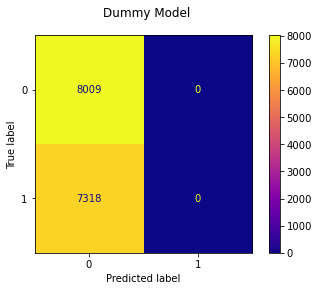

In [181]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [182]:
simple_logreg_model = LogisticRegression(random_state=42, penalty='none')

In [183]:
simple_logreg_model.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=42)

In [184]:
simple_logreg_model.predict(X_train)[:50]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0], dtype=int64)

Helper cross validation function taken from classifciation workflow lecture

In [185]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [186]:
dummy_model_results = ModelWithCV(
                        model=dummy_model,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train
)

CV Results for `dummy` model:
            0.52254 ± 0.00018 accuracy
        


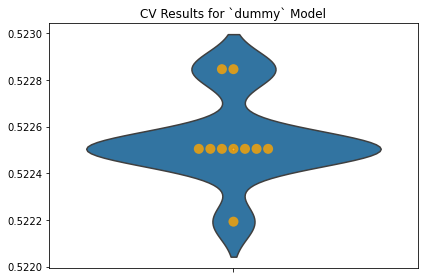

In [187]:
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary()

In [188]:
simple_logreg_results = ModelWithCV(
                        model=simple_logreg_model,
                        model_name='simple_logreg',
                        X=X_train, 
                        y=y_train
)

CV Results for `simple_logreg` model:
            0.77412 ± 0.00964 accuracy
        


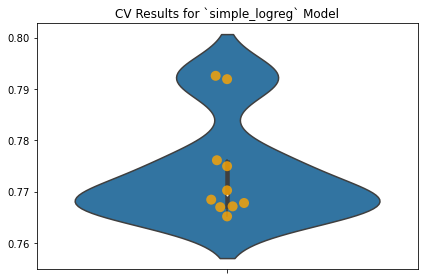

In [189]:
# Saving variable for convenience
model_results = simple_logreg_results

# Plot CV results
fig, ax = plt.subplots()
ax = model_results.plot_cv(ax)
plt.tight_layout();
# Print CV results
model_results.print_cv_summary()

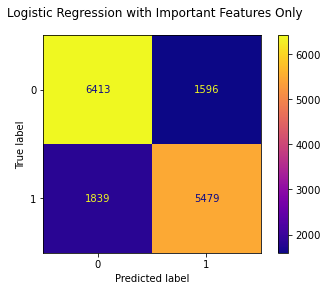

In [191]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression with Important Features Only")

plot_confusion_matrix(simple_logreg_model, X_train, y_train, ax=ax, cmap="plasma");

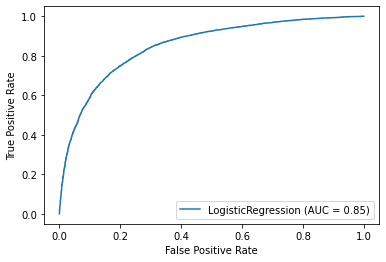

In [192]:
plot_roc_curve(simple_logreg_model, X_train, y_train);

In [213]:
X_train.iloc[11]

doctor_recc_seasonal           0.0
opinion_seas_vacc_effective    4.0
opinion_seas_risk              1.0
opinion_seas_sick_from_vacc    5.0
sex                            1.0
marital_status                 0.0
household_children             0.0
18 - 34 Years                  0.0
35 - 44 Years                  0.0
45 - 54 Years                  1.0
55 - 64 Years                  0.0
65+ Years                      0.0
12 Years                       0.0
< 12 Years                     0.0
College Graduate               0.0
Some College                   1.0
Black                          0.0
Hispanic                       0.0
Other or Multiple              0.0
White                          1.0
<= $75,000, Above Poverty      1.0
> $75,000                      0.0
Below Poverty                  0.0
atmpeygn                       0.0
bhuqouqj                       0.0
dqpwygqj                       0.0
fpwskwrf                       0.0
kbazzjca                       0.0
lrircsnp            

In [207]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [208]:
tree_clf.score(X_train, y_train)

0.7544855483786781

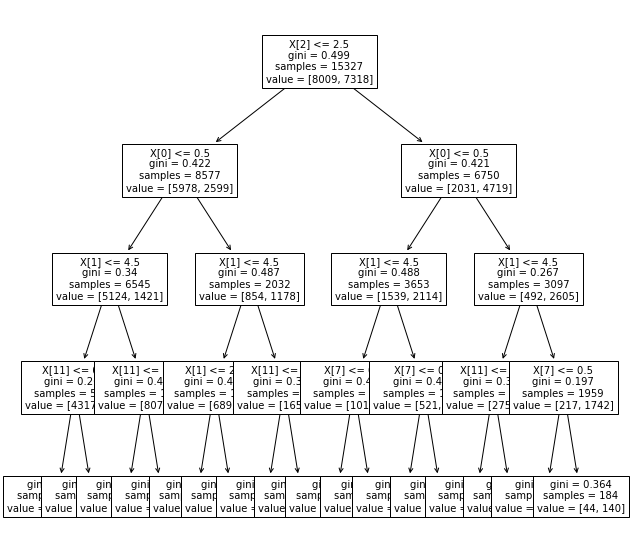

In [210]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree_clf, ax=ax, fontsize=10);